In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset = pd.read_csv('Fichiers_csv/CAR.csv')

In [3]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_dataset.shape

(4340, 8)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
print(car_dataset.fuel.value_counts())
print("--------------------------------")
print(car_dataset.seller_type.value_counts())
print("--------------------------------")
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
--------------------------------
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
--------------------------------
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [8]:
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}}, inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)

In [9]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Second Owner


In [10]:
X = car_dataset.drop(columns=['name','selling_price','owner'], axis=1)
Y = car_dataset['selling_price']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [12]:
lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
Y_train_prediction = lin_reg_model.predict(X_train)

In [15]:
error_score = metrics.r2_score(Y_train, Y_train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4270700386071742


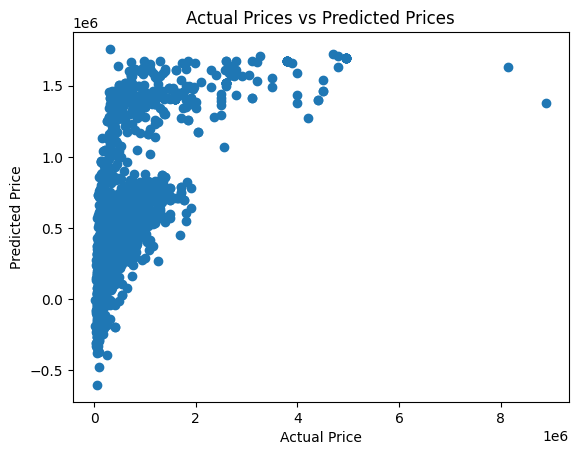

In [16]:
plt.scatter(Y_train, Y_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [18]:
Y_test_prediction = lin_reg_model.predict(X_test)

In [19]:
error_score = metrics.r2_score(Y_test, Y_test_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5035628808178241
